In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
Sequential = tf.keras.models.Sequential
from keras import layers,models
to_categorical = tf.keras.utils.to_categorical

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
7


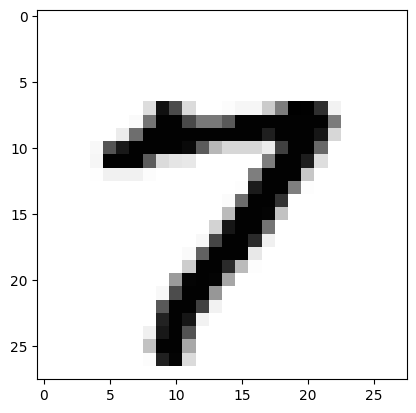

In [3]:
# data preparation and importing the data
(x_train, y_train), (x_test, y_test) = mnist.load_data() #We have partitioned the data into training and testing sets

# Exploring the data
print(x_train.shape) # 60000 images with 28x28 pixels
print(x_test.shape) # 10000 images with 28x28 pixels
print(y_train.shape) # 60000 labels
print(y_test.shape) # 10000 labels

index_image = 5555
print(y_train[index_image])
plt.imshow(x_train[index_image], cmap='Greys')
plt.show()

In [4]:
# Data preprocessing
# 4d form as input (size of data, 28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Converting data in form of float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data in range 0 to 1

x_train /= 255
x_test /= 255

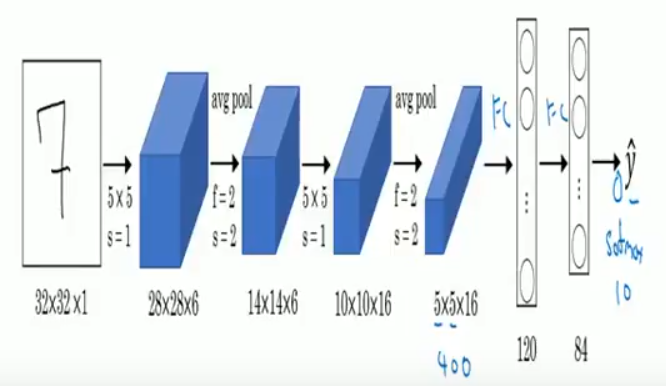

In [5]:
#  Creating the model

# instantiate model
model = Sequential()

# add a convolutional layer
model.add(layers.Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(28,28,1), padding='same'))

# add a average pooling layer
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))

# add a convolutional layer
model.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))

# add a average pooling layer
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# add fully connected layers
model.add(layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='same'))

# add flatten layer
model.add(layers.Flatten())

# add dense layer
model.add(layers.Dense(84, activation='tanh'))

# add output layer
model.add(layers.Dense(10, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

model.summary()


c:\Users\Desktop\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 27, 27, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 11, 11, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │     1,219,764 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,271,306 (4.85 MB)

 Trainable params: 1,271,306 (4.85 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# one hot encoding to the labels (0 to 9)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# training the model
hist = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test)) # verbose = 1 to see the progress

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7436 - loss: 1.0312 - val_accuracy: 0.9105 - val_loss: 0.3145
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9124 - loss: 0.3052 - val_accuracy: 0.9271 - val_loss: 0.2472
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9277 - loss: 0.2472 - val_accuracy: 0.9386 - val_loss: 0.2091
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9378 - loss: 0.2152 - val_accuracy: 0.9453 - val_loss: 0.1845
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9457 - loss: 0.1896 - val_accuracy: 0.9517 - val_loss: 0.1689
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9520 - loss: 0.1684 - val_accuracy: 0.9549 - val_loss: 0.1551
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9576 - loss: 0.1525 - val_accuracy: 0.9579 - val_loss: 0.1431
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9598 - loss: 0.1428 - 

In [14]:
# Save the model

model.save('mnist_model.h5')

Text(0, 0.5, 'acc')

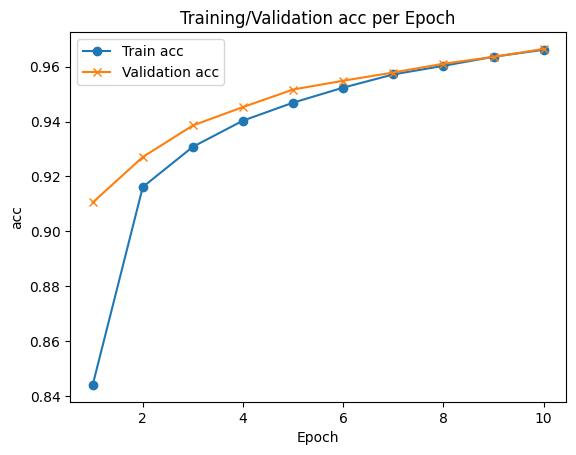

In [7]:
# plotting the accuracy

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

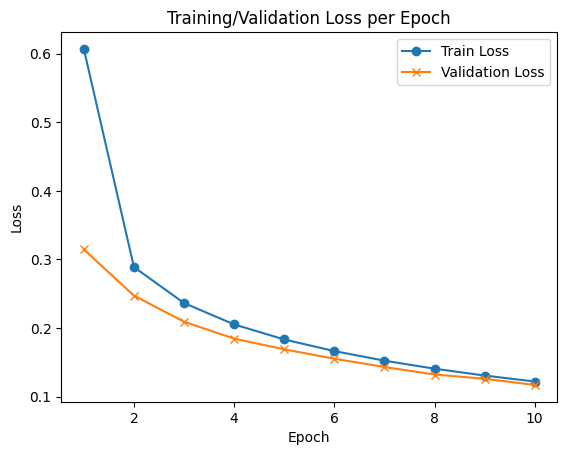

In [8]:
# Ploting the loss

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


In [9]:
# predicting the model

model.predict(x_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[2.8218932e-05, 4.3136974e-06, 9.5739582e-05, 9.9845682e-05,
        6.3066727e-05, 1.6322985e-04, 2.2186164e-07, 9.9936396e-01,
        4.1016589e-05, 1.4047223e-04],
       [1.0841242e-03, 8.1404834e-04, 9.9243307e-01, 1.3353711e-03,
        2.2964484e-06, 4.6082423e-04, 2.1059685e-03, 1.3181409e-06,
        1.7511144e-03, 1.1865475e-05],
       [9.4444677e-06, 9.9821943e-01, 3.5489452e-04, 3.4216853e-04,
        4.2540149e-05, 9.5554358e-05, 2.5159933e-04, 2.7407988e-04,
        3.8001162e-04, 3.0219097e-05],
       [9.9720335e-01, 9.5633413e-07, 5.3114526e-04, 2.0377310e-04,
        1.4707926e-04, 3.2117474e-04, 6.4924546e-04, 2.1364365e-04,
        1.3662101e-04, 5.9308350e-04]], dtype=float32)

In [10]:
# See actual results

y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

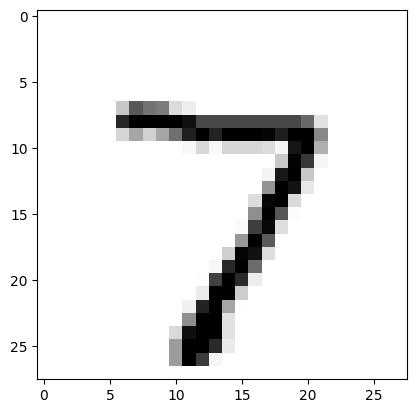

In [13]:
imageIndex = 0
plt.imshow(x_test[imageIndex].reshape(28, 28), cmap='Greys')
plt.show()